In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import awkward as ak

In [3]:
with uproot.open("/data9/coherent/data/LiqAr/cenns750_sims/1500952/output_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    chanid = cenns['chanid'].array()
    genz = cenns['genz'].array()

In [4]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genz": genz}, depth_limit=1)

Looking at all PEs for an event

In [4]:
def cut1(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.sum(ly)
    else:
        return -1

In [5]:
vals = [cut1(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ec8983ee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

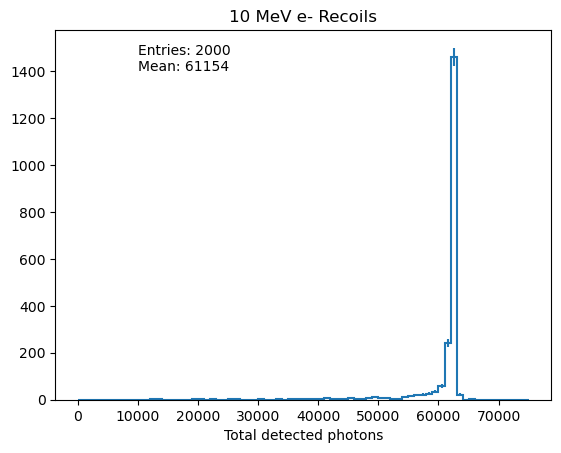

In [6]:
ly = Hist(hist.axis.Regular(75, 0, 75000))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("10 MeV e- Recoils")
ax.set_xlabel("Total detected photons")
ax.text(10000, 1400, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ly.plot1d(ax=ax)

In [33]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_totalPEs.png")

In [7]:
def cut2(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return len(event['chans'])
    else:
        return -1

In [8]:
vals = [cut2(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ebdfe8d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

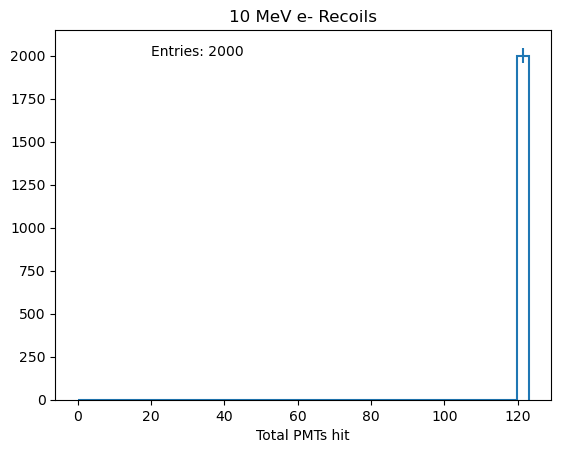

In [9]:
pmt = Hist(hist.axis.Regular(40, 0, 123, name="Total PMTs hit"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("10 MeV e- Recoils")
ax.text(20, 2000, f'Entries: {np.sum(pmt.values()):.0f}')
pmt.plot(ax=ax)

In [11]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_totalhits.png")

In [10]:
def cut3(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.max(ly)
    else:
        return -1

In [11]:
vals = [cut3(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ebde9e260>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

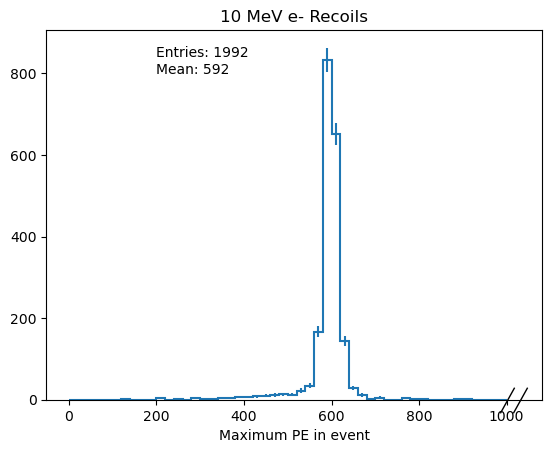

In [12]:
pmt = Hist(hist.axis.Regular(50, 0, 1000, name="Maximum PE in event"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("10 MeV e- Recoils")
ax.text(200, 800, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [30]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_maxPEs.png")

In [13]:
def cut4(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ly
    else:
        return -1

In [14]:
vals = [cut4(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ebdf3cca0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

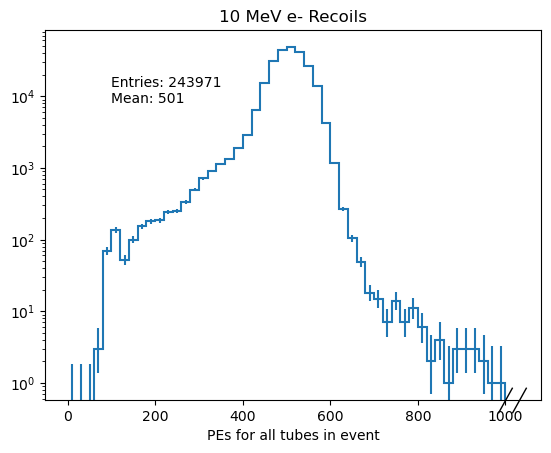

In [15]:
pmt = Hist(hist.axis.Regular(50, 0, 1000, name="PEs for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("10 MeV e- Recoils")
ax.set_yscale('log')
ax.text(100, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [19]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_allPEs.png")

Look at same plot but for photons in first 90 ns

In [5]:
def cut5(event):
    ly = np.array([len(chan[chan < 90]) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ly
    else:
        return -1

In [8]:
vals = [cut5(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f52688040a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

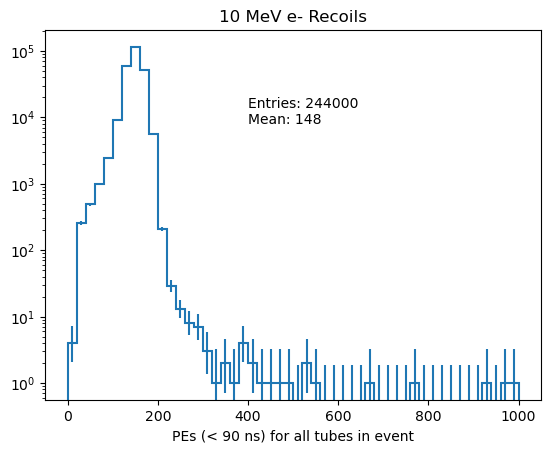

In [12]:
pmt = Hist(hist.axis.Regular(50, 0, 1000, name="PEs (< 90 ns) for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("10 MeV e- Recoils")
ax.set_yscale('log')
ax.text(400, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [13]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_90ns_allPEs.png")